## Notação matemática usada na prática

Adotamos o padrão matemático para definir as variáveis a seguir. Nesse padrão, todas as variáveis que representam matrizes estão em maiúsculas, vetores em negrito e minúscula e, valores numéricos, como variáveis minusculas. Logo após, mapeamos cada variável matemática com uma respectiva variável em Python.

- $m$: quantidade de instancias
- $f$: quantidade de atributos
- $X$: Matriz de instâncias representadas pelo seus atributos dimensão $(m,f)$
- $\pmb{y}$: Vetor de tamanho $m$ representando a classe real de cada instância
- $\pmb{\hat{y}}$: Vetor de predições que, para cada instancia, possui o valor predito para ela. Caso seja uma classificação binária, este valor será 0 ou 1
- $\pmb{w}$: vetor de pesos para ponderar os atributos (também chamado de parâmetros), tamanho $f$
- $w_j$: $j$-ésimo valor do vetor $\pmb{w}$ que pondera $j$-ésimo atributo da matriz $X$
- $b$: Valor de viés da regressão logística (do inglês, bias term)
- $\pmb{z}$: vetor de tamanho $m$ representado o resultado da função z, para cada instancia $m$. 
- $z_i$: Representa o resultado da função z para a instancia $i$. 
- $\pmb{a}$: Vetor de ativações de tamanho $m$ calculada por meio do vetor $z$
- $a_i$: Valor de ativação da instancia $i$
- $\pmb{z^d}$: Derivada $\frac{\partial J}{\partial z_i}$ para cada instância $i$ do modelo. Possui o mesmo tamanho que  $\pmb{z}$
- $\pmb{w^d}$ Derivada $\frac{\partial J}{\partial w_j}$ para cada peso $j$ do modelo, possui o mesmo tamanho de $\pmb{w}$
- $b^d$ Derivada $\frac{\partial J}{\partial b}$ 

## Implementação das classes FuncaoAtivacao e RegressaoLogistica

**Atividade 1: Função de ativação**: Iniciamente, você deverá criar a função de ativação e a derivada $\frac{\partial J}{\partial w_j}$ quando se usa essa função. Para isso, você deverá criar uma instancia da classe `FuncaoAtivação` representando a função sigmoid. Para criar esse objeto, você deverá passar dois parametros: sua função de ativação, representada pelo parâmetro `funcao`, e a função que calcula o vetor gradiente $\pmb{z^d}$, representada pelo parâmetro `dz_funcao`. Essa derivada é passada na função de ativação pois será diferente dependendo de qual função de ativação será usada.

O atributo `funcao`, irá esperar um parametro  `z`, representando o vetor $\pmb{z}$ e, o atributo `dz_funcao`, irá esperar como parametro `a`, `z` e `y` representando os vetores $\pmb{a}$, $\pmb{z}$ e $\pmb{y}$. Os pâmetros `a`, `z` e `y` podem ser listas ou números reais, por isso use a biblioteca numpy para fazer as operações matemáticas ao invés das funções do pacote `math` durante toda a prática (ex. [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html), [np.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)). Essa biblioteca trabalha com listas e vetores da mesma forma além de usar vetorização.


<!--
A palavra **função** está sendo usada em dois contextos aqui: você criará três **instancias da classe** FuncaoAtivacao, cada uma, passando como parametro uma função (e sua derivada). Por exemplo, **uma das instancias da da classe FuncaoAtivação** será a sigmoid em que se criará **um objeto de nome "sigmoid"** com dois parametros: (1) a **função de transformação sigmoid** e, outro, **a função do cálculo** da derivada $\frac{\partial J}{\partial w_j}$ baseada na função de tranformação sigmoid. 
-->

Para implementar as funções e passá-las como parâmetro, você pode criar uma função anônima por meio da [função lambda](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions).  Veja abaixo um exemplo de usar funções como parametros. 

In [4]:
#criação de uma funcao de soma
soma = lambda x,y:x+y
result = soma(3,4)
print(result)

#Exemplo mais bonitinho :)
#Cada função retorna o oi em um determinado idioma
#a função lambda recebe como parametro o nome da pessoa
#e retorna uma string com a forma de dar oi nesse idioma
oi_pt = lambda str_pessoa:f"Oi {str_pessoa}! Como vai?"
oi_en = lambda str_pessoa:f"Hi {str_pessoa}! How are you?"

def da_oi_para(funcao_de_dar_oi,str_pessoa):
    print("..... Minha linda interface de dar oi ------")
    str_oi = funcao_de_dar_oi(str_pessoa)
    print(str_oi)
    print(".....")
    
#essa funcao é passada como parametro na funcao da_oi_para
da_oi_para(oi_en,"Alice")
da_oi_para(oi_pt,"Alice")


     

7
..... Minha linda interface de dar oi ------
Hi Alice! How are you?
.....
..... Minha linda interface de dar oi ------
Oi Alice! Como vai?
.....


Faça o teste abaixo da função sigmoide e da sua derivada:

In [5]:
!python3 -m regressao_logistica_test TestFuncaoAtivacao.test_sigmoid

Iteração: 0 Loss: 0.6931471805599452
Iteração: 1 Loss: 0.5951597524730586
Iteração: 2 Loss: 0.5334392841945277
Iteração: 3 Loss: 0.49107292759670407
Iteração: 4 Loss: 0.4602155331573348
Iteração: 5 Loss: 0.4367650776156137
Iteração: 6 Loss: 0.41834734759632675
Iteração: 7 Loss: 0.4034899606594091
Iteração: 8 Loss: 0.3912339267474669
Iteração: 9 Loss: 0.3809305796956521
Iteração: 10 Loss: 0.3721273619998846
Iteração: 11 Loss: 0.3645001186024984
Iteração: 12 Loss: 0.3578112993584767
Iteração: 13 Loss: 0.35188328337074665
Iteração: 14 Loss: 0.346580864155386
Iteração: 15 Loss: 0.3417994605013124
Iteração: 16 Loss: 0.3374570042210602
Iteração: 17 Loss: 0.33348824637944896
Iteração: 18 Loss: 0.3298406888437937
Iteração: 19 Loss: 0.32647162957309545
Iteração: 20 Loss: 0.3233459847219673
Iteração: 21 Loss: 0.3204346614061509
Iteração: 22 Loss: 0.31771332666297925
Iteração: 23 Loss: 0.31516146539961226
Iteração: 24 Loss: 0.3127616518136079
Iteração: 25 Loss: 0.31049898036029666
Iteração: 26 Lo

In [6]:
!python3 -m regressao_logistica_test TestFuncaoAtivacao.test_sigmoid_dz

Iteração: 0 Loss: 0.6931471805599452
Iteração: 1 Loss: 0.5963650247315136
Iteração: 2 Loss: 0.5350539001971995
Iteração: 3 Loss: 0.4929009384564196
Iteração: 4 Loss: 0.4622032828976096
Iteração: 5 Loss: 0.43889129103083474
Iteração: 6 Loss: 0.4205980023251526
Iteração: 7 Loss: 0.4058527427159315
Iteração: 8 Loss: 0.39369724464456435
Iteração: 9 Loss: 0.383483552538414
Iteração: 10 Loss: 0.3747599320692408
Iteração: 11 Loss: 0.3672031154305667
Iteração: 12 Loss: 0.3605764437553145
Iteração: 13 Loss: 0.3547031504799261
Iteração: 14 Loss: 0.34944882414741146
Iteração: 15 Loss: 0.34470960973622977
Iteração: 16 Loss: 0.340404094651731
Iteração: 17 Loss: 0.3364676175048123
Iteração: 18 Loss: 0.3328482043666183
Iteração: 19 Loss: 0.3295036196459518
Iteração: 20 Loss: 0.32639919394879774
Iteração: 21 Loss: 0.3235062023846683
Iteração: 22 Loss: 0.3208006386671138
Iteração: 23 Loss: 0.3182622777273739
Iteração: 24 Loss: 0.31587395131396073
Iteração: 25 Loss: 0.31362098267348343
Iteração: 26 Loss

**Atividade 2 - implementação do método `z` da classe `RegressaoLogistica`**: Essa classe possui os seguintes atributos:

- `arr_w`: vetor de pesos $\pmb{w}$
- `b`: Valor de viés da regressão logística
- `func_ativacao`: função de ativação a ser usada. Esse atributo é uma função Python
- `dz_func`: função derivada a ser usada de acordo com a função de ativação. Esse atributo também é uma função Python
- `int_max_it`: Número de iterações (épocas) a rodar a regressão logística
- `mat_x`: Matriz $X$ de atributos por instâncias
- `arr_y`: Vetor de classes reais $\pmb{y}$
- `arr_z`: vetor de resultados $\pmb{z}$ 
- `arr_a`: vetor de ativações $\pmb{a}$
- `gradiente`: Instancia da classe `Gradiente` que possui os atributos `arr_dz`, `arr_dw` e `db` representando, respectivamente, $\pmb{z^d}$, $\pmb{w^d}$ e $b^d$. 

Você deverá, por meio do vetor de pesos `arr_w` (atributo da classe) e a matriz de atributos `mat_x` (passado como parâmetro) implementar o método `z` que retornará o vetor de resultados $\pmb{z}$. Use o [método dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.dot.html) e o [atributo T](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.T.html) dos arranjos numpy.

In [7]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_z

Iteração: 0 Loss: 0.6931471805599452
Iteração: 1 Loss: 0.5956359211476738
Iteração: 2 Loss: 0.5336860354174785
Iteração: 3 Loss: 0.4909407487265743
Iteração: 4 Loss: 0.4597026683182006
Iteração: 5 Loss: 0.4359058587136002
Iteração: 6 Loss: 0.41718126839971315
Iteração: 7 Loss: 0.4020532030248604
Iteração: 8 Loss: 0.38955757882361447
Iteração: 9 Loss: 0.37904084456015646
Iteração: 10 Loss: 0.3700462679301885
Iteração: 11 Loss: 0.3622462613397978
Iteração: 12 Loss: 0.35540048441292954
Iteração: 13 Loss: 0.34932904773182744
Iteração: 14 Loss: 0.34389489045250005
Iteração: 15 Loss: 0.3389919038513733
Iteração: 16 Loss: 0.3345367507263547
Iteração: 17 Loss: 0.33046311882607526
Iteração: 18 Loss: 0.3267176117071564
Iteração: 19 Loss: 0.32325676255631136
Iteração: 20 Loss: 0.32004483180693577
Iteração: 21 Loss: 0.317052160697934
Iteração: 22 Loss: 0.31425392503877947
Iteração: 23 Loss: 0.3116291810285497
Iteração: 24 Loss: 0.30916012690872724
Iteração: 25 Loss: 0.3068315259963182
Iteração: 26

**Atividade 3 - Forward propagation:** Implemente o método  `forward_propagation`. Nele, você irá usar a matriz $X$, representada por `mat_x`, o vetor de pesos $\pmb{w}$, representado pelo atributo `arr_w` para calcular os vetores $\pmb{z}$ e e $\pmb{a}$ por meio do método `z` e da função de ativação, armazenada no atributo `func_ativacao`. Verifique nesse método se o `arr_w` está definido, caso não esteja, você deverá inicializá-lo com zero em todas as posições (use a função [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)). Veja o tamanho de w para isso

In [8]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_forward_propagation

Iteração: 0 Loss: 0.6931471805599452
Iteração: 1 Loss: 0.5954815035680684
Iteração: 2 Loss: 0.5338397985548455
Iteração: 3 Loss: 0.49149362858822854
Iteração: 4 Loss: 0.4606518511706561
Iteração: 5 Loss: 0.43722585931466296
Iteração: 6 Loss: 0.4188422920822281
Iteração: 7 Loss: 0.4040262727083342
Iteração: 8 Loss: 0.39181595462142693
Iteração: 9 Loss: 0.38156029719802687
Iteração: 10 Loss: 0.3728049815881
Iteração: 11 Loss: 0.3652246240318202
Iteração: 12 Loss: 0.358580856911577
Iteração: 13 Loss: 0.352695543290115
Iteração: 14 Loss: 0.34743317565916987
Iteração: 15 Loss: 0.34268902254804373
Iteração: 16 Loss: 0.33838096975522786
Iteração: 17 Loss: 0.3344437933288472
Iteração: 18 Loss: 0.33082506750535223
Iteração: 19 Loss: 0.3274821932885436
Iteração: 20 Loss: 0.3243802087578628
Iteração: 21 Loss: 0.3214901535332413
Iteração: 22 Loss: 0.31878783192251203
Iteração: 23 Loss: 0.3162528668305093
Iteração: 24 Loss: 0.3138679684081035
Iteração: 25 Loss: 0.31161836315539837
Iteração: 26 Loss

**Atividade 4 - Backward propagation**: Você deverá implementar a função que calcula os gradientes conforme especificado no método

In [9]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_backward_propagation

Iteração: 0 Loss: 0.6931471805599452
Iteração: 1 Loss: 0.59541943228451
Iteração: 2 Loss: 0.5333998604977257
Iteração: 3 Loss: 0.49063269597371606
Iteração: 4 Loss: 0.45938998565088596
Iteração: 5 Loss: 0.43559467047367434
Iteração: 6 Loss: 0.41687309906939524
Iteração: 7 Loss: 0.4017476154070845
Iteração: 8 Loss: 0.38925334968420233
Iteração: 9 Loss: 0.37873650766703726
Iteração: 10 Loss: 0.3697403638602853
Iteração: 11 Loss: 0.36193744677648254
Iteração: 12 Loss: 0.3550875732841168
Iteração: 13 Loss: 0.3490110195090639
Iteração: 14 Loss: 0.34357088316255013
Iteração: 15 Loss: 0.3386612005867071
Iteração: 16 Loss: 0.33419876403127874
Iteração: 17 Loss: 0.3301173750874941
Iteração: 18 Loss: 0.32636373652631717
Iteração: 19 Loss: 0.3228944674887852
Iteração: 20 Loss: 0.31967390256215045
Iteração: 21 Loss: 0.3166724467469566
Iteração: 22 Loss: 0.3138653305164303
Iteração: 23 Loss: 0.3112316567945194
Iteração: 24 Loss: 0.3087536636315238
Iteração: 25 Loss: 0.3064161481326383
Iteração: 26 

**Atividade 5 - Calcule a loss function**: Implemente no método `loss_function` a função de perda por meio da entropia cruzada, usando os atributos `arr_a` e `arr_y`

In [10]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_loss_function

Iteração: 0 Loss: 0.6931471805599452
Iteração: 1 Loss: 0.5959142008938759
Iteração: 2 Loss: 0.5344434196102639
Iteração: 3 Loss: 0.49220797221645723
Iteração: 4 Loss: 0.46144838171383357
Iteração: 5 Loss: 0.4380797307444652
Iteração: 6 Loss: 0.419731088635509
Iteração: 7 Loss: 0.4049310987035766
Iteração: 8 Loss: 0.39272172669758404
Iteração: 9 Loss: 0.382455427602698
Iteração: 10 Loss: 0.37368083323909673
Iteração: 11 Loss: 0.36607494576424415
Iteração: 12 Loss: 0.35940128248276226
Iteração: 13 Loss: 0.35348317614376673
Iteração: 14 Loss: 0.3481862559639434
Iteração: 15 Loss: 0.343406664540062
Iteração: 16 Loss: 0.33906295610718645
Iteração: 17 Loss: 0.3350904146172702
Iteração: 18 Loss: 0.3314369969142348
Iteração: 19 Loss: 0.3280603887107404
Iteração: 20 Loss: 0.324925836183877
Iteração: 21 Loss: 0.32200452700753446
Iteração: 22 Loss: 0.3192723664333395
Iteração: 23 Loss: 0.3167090413347038
Iteração: 24 Loss: 0.3142972968305333
Iteração: 25 Loss: 0.312022371689459
Iteração: 26 Loss:

**Atividade 6 - Atualizar pesos**: Atualize os pesos `arr_w` e `b` por meio do gradiente e do parâmetro `learning_rate` 

In [11]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_atualiza_pesos

Iteração: 0 Loss: 0.6931471805599452
Iteração: 1 Loss: 0.5963038697648233
Iteração: 2 Loss: 0.5351560794328624
Iteração: 3 Loss: 0.49318768428252807
Iteração: 4 Loss: 0.46265251738227675
Iteração: 5 Loss: 0.43947652004815074
Iteração: 6 Loss: 0.4212963141362019
Iteração: 7 Loss: 0.40664558774100706
Iteração: 8 Loss: 0.3945697292715667
Iteração: 9 Loss: 0.3844236095072944
Iteração: 10 Loss: 0.37575764620365953
Iteração: 11 Loss: 0.3682502211514476
Iteração: 12 Loss: 0.361665958265038
Iteração: 13 Loss: 0.355829105256532
Iteração: 14 Loss: 0.3506060660241751
Iteração: 15 Loss: 0.34589365122272936
Iteração: 16 Loss: 0.34161099943625667
Iteração: 17 Loss: 0.3376939114418331
Iteração: 18 Loss: 0.33409080521047463
Iteração: 19 Loss: 0.3307597807894409
Iteração: 20 Loss: 0.3276664587829565
Iteração: 21 Loss: 0.32478236682902156
Iteração: 22 Loss: 0.3220837200692779
Iteração: 23 Loss: 0.31955048878964887
Iteração: 24 Loss: 0.31716567803309725
Iteração: 25 Loss: 0.3149147655184007
Iteração: 26 

**Atividade 7 - método `fit`**: Cria o modelo de regressão logistica por meio de `int_max_it` épocas
        imprime, a cada 10 épocas, a loss function obtida

In [12]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_fit

Iteração: 0 Loss: 0.6931471805599452
Iteração: 1 Loss: 0.5952518434938691
Iteração: 2 Loss: 0.5331497246850616
Iteração: 3 Loss: 0.4903911074067584
Iteração: 4 Loss: 0.45922083207940273
Iteração: 5 Loss: 0.4355383766498814
Iteração: 6 Loss: 0.41695380778568436
Iteração: 7 Loss: 0.4019787670057856
Iteração: 8 Loss: 0.3896414722169553
Iteração: 9 Loss: 0.3792836952576084
Iteração: 10 Loss: 0.37044588251466337
Iteração: 11 Loss: 0.362798777005401
Iteração: 12 Loss: 0.3561010913181455
Iteração: 13 Loss: 0.3501724454988495
Iteração: 14 Loss: 0.3448755777470863
Iteração: 15 Loss: 0.34010436171147973
Iteração: 16 Loss: 0.33577555742897575
Iteração: 17 Loss: 0.3318230201989896
Iteração: 18 Loss: 0.32819356223333906
Iteração: 19 Loss: 0.3248439472570607
Iteração: 20 Loss: 0.3217386754786426
Iteração: 21 Loss: 0.31884832887546344
Iteração: 22 Loss: 0.31614831961777623
Iteração: 23 Loss: 0.31361793252483616
Iteração: 24 Loss: 0.3112395846940915
Iteração: 25 Loss: 0.30899824741811427
Iteração: 26 

**Atividade 8 - método predict**: usando as instancias `mat_x`, representando a matriz $X$ das instâncias que queremos prever, calcula-se o forward_propagation do modelo para, logo após, retornar o vetor de predições $\hat{y}$. Para cada instancia $i$, esse vetor retornará 0 se $\pmb{a_i}<0.5$ ou 1, caso contrário.
Dica: você pode fazer isso de forma bem simples usando vetorização. Isso é mais eficiente computacionalmente. Exemplo:

In [13]:
import numpy as np
meu_querido_vetor = np.array([3,2,8,9,2])
#a linha abaixo retorna true ou false, dependendo do valor
print(meu_querido_vetor>4)
#Se multiplicamos um número por um vetor numpy de true e false 
#. é o mesmo de multiplicarmos o número por 1 ou 0, respectivamente
print(3*(meu_querido_vetor>4))


[False False  True  True False]
[0 0 3 3 0]


In [14]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_predict

Iteração: 0 Loss: 0.6931471805599452
Iteração: 1 Loss: 0.5957143598237277
Iteração: 2 Loss: 0.5340088809105314
Iteração: 3 Loss: 0.49158776598306914
Iteração: 4 Loss: 0.4607007513081471
Iteração: 5 Loss: 0.4372544768477802
Iteração: 6 Loss: 0.418866888551528
Iteração: 7 Loss: 0.4040568098897556
Iteração: 8 Loss: 0.39185844767187783
Iteração: 9 Loss: 0.3816183733883651
Iteração: 10 Loss: 0.37288082228149905
Iteração: 11 Loss: 0.3653195209984885
Iteração: 12 Loss: 0.35869554153081723
Iteração: 13 Loss: 0.35283038397439526
Iteração: 14 Loss: 0.34758829859000334
Iteração: 15 Loss: 0.3428643872871218
Iteração: 16 Loss: 0.3385764178967563
Iteração: 17 Loss: 0.3346590807584521
Iteração: 18 Loss: 0.3310598864926817
Iteração: 19 Loss: 0.3277361881379307
Iteração: 20 Loss: 0.3246529872790167
Iteração: 21 Loss: 0.3217812957277645
Iteração: 22 Loss: 0.3190968967619025
Iteração: 23 Loss: 0.3165793976846776
Iteração: 24 Loss: 0.3142114974880858
Iteração: 25 Loss: 0.31197841521180597
Iteração: 26 Los

## Meu primeiro método de Aprendizado de Máquina: Vamos ver funcionando 😍 

In [15]:
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from regressao_logistica import *
from util import *

Use o dataset abaixo. Mande rodar e plote também o XX. Veja que ele irá plotar uma divisão linear dos resultados. Ainda não é a melhor solução para os dados que temos abaixo. Alguns problemas, que dizemos que são **linearmente separáveis**, usar uma função linear já é o suficiente.

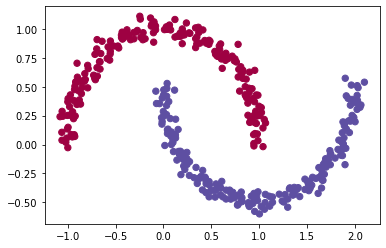

In [16]:
#Dados a serem usados
mat_x, arr_y = sklearn.datasets.make_moons(400, noise=0.05)
plt.scatter(mat_x[:,0], mat_x[:,1], s=40, c=arr_y, cmap=plt.cm.Spectral)

In [17]:
# Crie o modelo de regressão logistica para esses dados
funcao = lambda z:1/(1+np.exp((-1)*z))
dz_funcao = lambda a,z,y:np.subtract(a,y)
sigmoid = FuncaoAtivacao(funcao,dz_funcao)
obj_regressao_logistica =  RegressaoLogistica(funcao,dz_funcao,100)

In [18]:
#crie o modelo usando mat_x e arr_y
print(arr_y)
modelo = obj_regressao_logistica.fit(mat_x,arr_y,learning_rate=1.1)

[0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0
 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1
 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1
 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1
 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0
 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1
 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0]
Iteração: 0 Loss: 0.6931471805599452
Iteração: 1 Loss: 0.5965552230189403
Iteração: 2 Loss: 0.5350735411175174
Iteração: 3 Loss: 0.4926090886193294
Iteração: 4 Loss: 0.46155622112896255
It

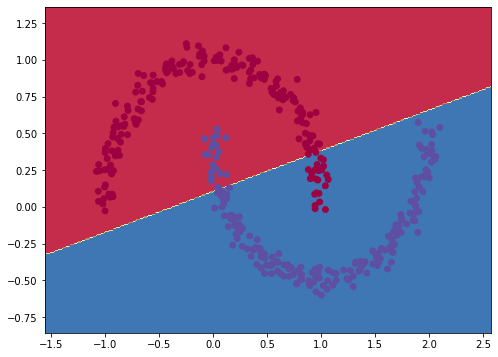

In [19]:
# Apresente aqui a superfície de decisão desses dados
plot_decision_boundary(obj_regressao_logistica,mat_x,arr_y)

Descreva o impacto ao alterar a taxa de aprendizado e o número de épocas (`learning_rate` e `int_max_it`, respectivamente) algum desses parâmetros podem ocasionar overfitting/underfitting? Quando?